# Investing.com Project - Feature Importance

`I have also created a web app built on this model with interactive UI.`
## `Web App Link:` https://naturalgas-prediction.herokuapp.com/

#### 

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score
from sklearn.metrics import accuracy_score
from scipy.spatial import distance
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBRegressor
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv("Time Series Dataset.csv")
df = df.drop(['Unnamed: 0'],axis=1)
df = df.rename(columns = {'Target Price':'Natural Gas Price'})
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.set_index(df['DATE'])
df = df.drop(['DATE'],axis=1)

In [4]:
df

,Natural Gas Price,Crude Oil Price,US Dollar Index,Texas Temperature,California Temperature,Natural Gas Production,GDP,U.S. total natural gas proved reserves (trillion cubic feet),Consumption,Net Imports
DATE,,,,,,,,,,
1995-01-01,1.614,17.56,89.94,48.1,49.9,18.599,7522.289,173.5,22.207,2.687
1995-01-02,1.748,17.84,91.87,52.5,51.9,18.599,7522.289,173.5,22.207,2.687
1995-01-03,1.750,17.54,94.04,56.9,55.4,18.599,7522.289,173.5,22.207,2.687
1995-01-04,1.866,17.64,93.89,64.2,59.7,18.599,7580.997,173.5,22.207,2.687
1995-01-05,2.018,18.18,92.14,73.2,66.0,18.599,7580.997,173.5,22.207,2.687
...,...,...,...,...,...,...,...,...,...,...
2020-01-02,2.630,42.61,85.26,41.1,48.7,33.485,20492.492,473.3,30.477,-2.732
2020-01-03,2.527,40.22,83.66,61.4,54.2,33.485,20659.102,473.3,30.477,-2.732
2020-01-04,3.354,35.79,84.29,64.6,62.0,33.485,20813.325,473.3,30.477,-2.732


## Now that we have the dataset ready, lets do some exploratory data analysis to perceive correlations.

In [5]:
df.describe()

,Natural Gas Price,Crude Oil Price,US Dollar Index,Texas Temperature,California Temperature,Natural Gas Production,GDP,U.S. total natural gas proved reserves (trillion cubic feet),Consumption,Net Imports
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000
mean,4.149007,53.597386,91.502484,67.094771,63.793137,22.233588,14074.636768,280.903922,24.458098,2.143255
std,2.250768,28.729438,10.891089,14.451787,12.704175,4.510383,4039.019850,105.368560,2.694763,1.629860
min,1.614000,11.220000,71.800000,39.400000,41.200000,18.051000,7522.289000,172.400000,21.699000,-2.732000
25%,2.587500,27.315000,82.352500,53.550000,51.950000,18.902000,10598.020000,191.700000,22.403000,1.181000
50%,3.353000,49.690000,90.545000,66.950000,63.400000,19.616000,14416.491500,247.800000,23.104000,2.784000
75%,4.938500,73.760000,98.355000,80.375000,76.075000,25.890000,17144.281000,348.800000,26.593000,3.422000
max,13.921000,140.000000,120.240000,93.400000,84.600000,33.899000,21694.458000,504.500000,31.132000,3.785000


In [6]:
df.corr()

,Natural Gas Price,Crude Oil Price,US Dollar Index,Texas Temperature,California Temperature,Natural Gas Production,GDP,U.S. total natural gas proved reserves (trillion cubic feet),Consumption,Net Imports
Natural Gas Price,1.000000,0.395076,-0.524989,0.043268,-0.020157,-0.408806,0.374945,-0.265638,-0.385927,0.464354
Crude Oil Price,0.395076,1.000000,-0.052496,-0.014904,-0.036911,0.197745,0.707418,0.435557,0.207132,-0.132602
US Dollar Index,-0.524989,-0.052496,1.000000,0.017181,0.071638,0.371129,-0.127551,0.305299,0.401102,-0.380360
Texas Temperature,0.043268,-0.014904,0.017181,1.000000,0.950942,-0.006972,0.010778,0.001843,-0.006806,0.017634
California Temperature,-0.020157,-0.036911,0.071638,0.950942,1.000000,0.061758,0.020903,0.054377,0.065332,-0.055338
Natural Gas Production,-0.408806,0.197745,0.371129,-0.006972,0.061758,1.000000,0.459057,0.938066,0.989933,-0.977301
GDP,0.374945,0.707418,-0.127551,0.010778,0.020903,0.459057,1.000000,0.586085,0.456017,-0.397916
U.S. total natural gas proved reserves (trillion cubic feet),-0.265638,0.435557,0.305299,0.001843,0.054377,0.938066,0.586085,1.000000,0.929440,-0.909952
Consumption,-0.385927,0.207132,0.401102,-0.006806,0.065332,0.989933,0.456017,0.929440,1.000000,-0.962097
Net Imports,0.464354,-0.132602,-0.380360,0.017634,-0.055338,-0.977301,-0.397916,-0.909952,-0.962097,1.000000


In [81]:
percent_nan = 100* df.isnull().sum() / len(df)
percent_nan.sort_values()

Natural Gas Price                                               0.0
Crude Oil Price                                                 0.0
US Dollar Index                                                 0.0
Texas Temperature                                               0.0
California Temperature                                          0.0
Natural Gas Production                                          0.0
GDP                                                             0.0
U.S. total natural gas proved reserves (trillion cubic feet)    0.0
Consumption                                                     0.0
Net Imports                                                     0.0
dtype: float64

#### Hence, the data is free of any nan values. 

### Also, there appears to be a substantial correlation between Natural Gas Prices and Crude Oil Price, US Dollar Index, GDP, Net Imports of Natural Gas, etc.

### plotting a pairplot to perceive them further:

<Figure size 1600x1200 with 0 Axes>

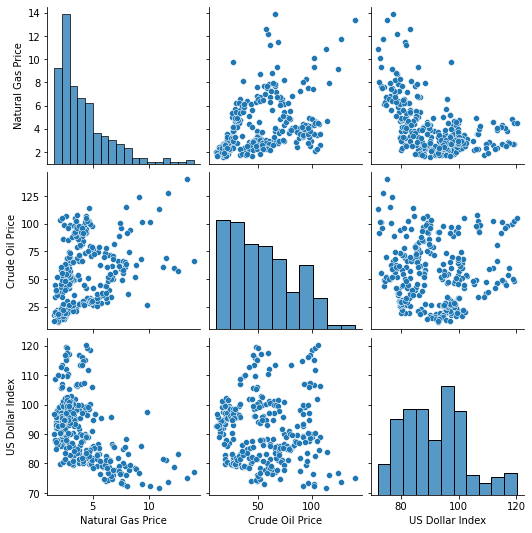

In [83]:
fig = plt.figure(figsize=(8,6),dpi=200)
sns.pairplot(df[['Natural Gas Price','Crude Oil Price','US Dollar Index']])

## `There seems to be practically functional relation between the target label and the features. Hence, the choice of feature selection seems statistically viable.`

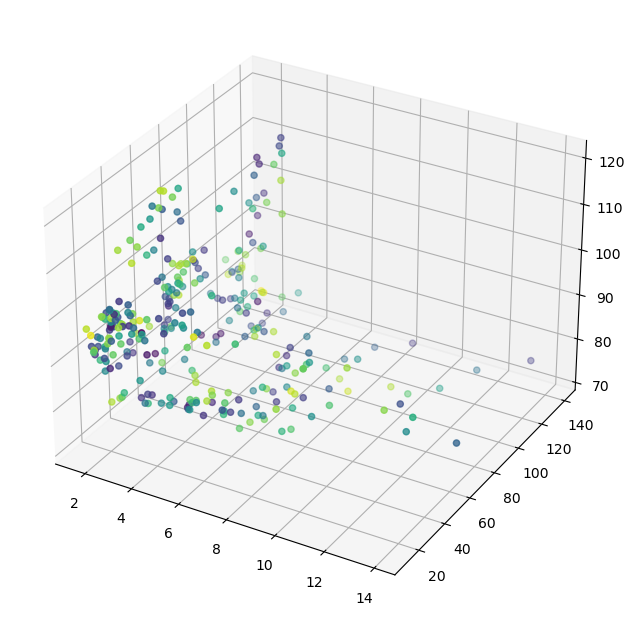

In [84]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(10,8), dpi=100)
ax = fig.add_subplot(111, projection='3d')
colors = df['Texas Temperature']
ax.scatter(df['Natural Gas Price'],df['Crude Oil Price'],df['US Dollar Index'],c=colors);

## A more graphial approach to showcase correlations between features and label:

<AxesSubplot:>

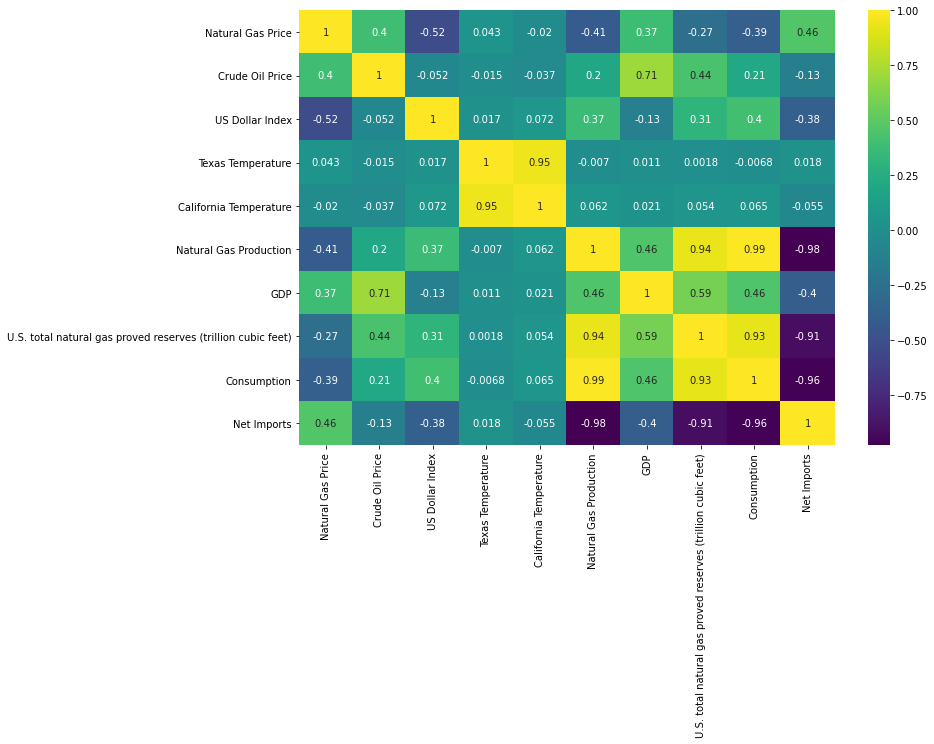

In [85]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='viridis',annot=True)

<AxesSubplot:xlabel='Natural Gas Price', ylabel='Crude Oil Price'>

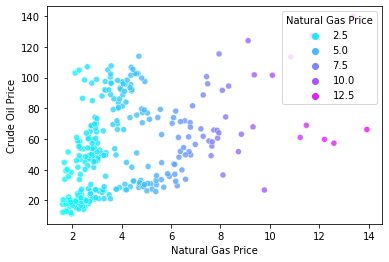

In [86]:
sns.scatterplot(x='Natural Gas Price',y='Crude Oil Price',data=df, alpha=0.8,hue='Natural Gas Price',palette='cool')

### Now, moving towards maching learning.

### Train | Test Split 

In [87]:
X = df.drop('Natural Gas Price', axis=1)
y = df['Natural Gas Price']

### **Performing a train test split on the data, with the test size of 30% and a random_state of 101.**

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### 1. XGBoost Algorithm 

In [21]:
XGBoost_model = XGBRegressor(n_estimators=800, learning_rate=0.02, n_jobs=4)
XGBoost_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], 
             verbose=False)

C:\Users\ubaid khan\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.02, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=800, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [88]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score
predictions = XGBoost_model.predict(X_test)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))
print("Mean Squared Error: " + str(mean_squared_error(predictions, y_test)))
print("Root Mean Squared Error: " + str(np.sqrt((mean_squared_error(predictions, y_test)))))
#print("Accuracy Score: " + str(accuracy_score(predictions, y_test)))

Mean Absolute Error: 0.5886013703449913
Mean Squared Error: 0.9311707534875076
Root Mean Squared Error: 0.9649718925893684


#### 

### 2. Grid Search CV + XGBoost

In [26]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
        pred = fitted_model.predict_proba(X_test_data)
    else:
        pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [27]:
XGBoost_model_CV = XGBRegressor()
param_grid = {
    'n_estimators': [800],'learning_rate':[0.02], 'n_jobs':[4]}

XGBoost_model_CV, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, XGBoost_model_CV, 
                                 param_grid, cv=5)

# Root Mean Squared Error
print(np.sqrt(-XGBoost_model_CV.best_score_))
print(XGBoost_model_CV.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
0.8967116850310519
{'learning_rate': 0.02, 'n_estimators': 800, 'n_jobs': 4}


In [89]:
predictions = XGBoost_model_CV.predict(X_test)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))
print("Mean Squared Error: " + str(mean_squared_error(predictions, y_test)))
print("Root Mean Squared Error: " + str(np.sqrt((mean_squared_error(predictions, y_test)))))

Mean Absolute Error: 0.6143258155947147
Mean Squared Error: 0.9550471013934
Root Mean Squared Error: 0.9772651131568137


## Now that we have the MSE & MSA scores and know how the model is performing, let's have a look at the feature importance!

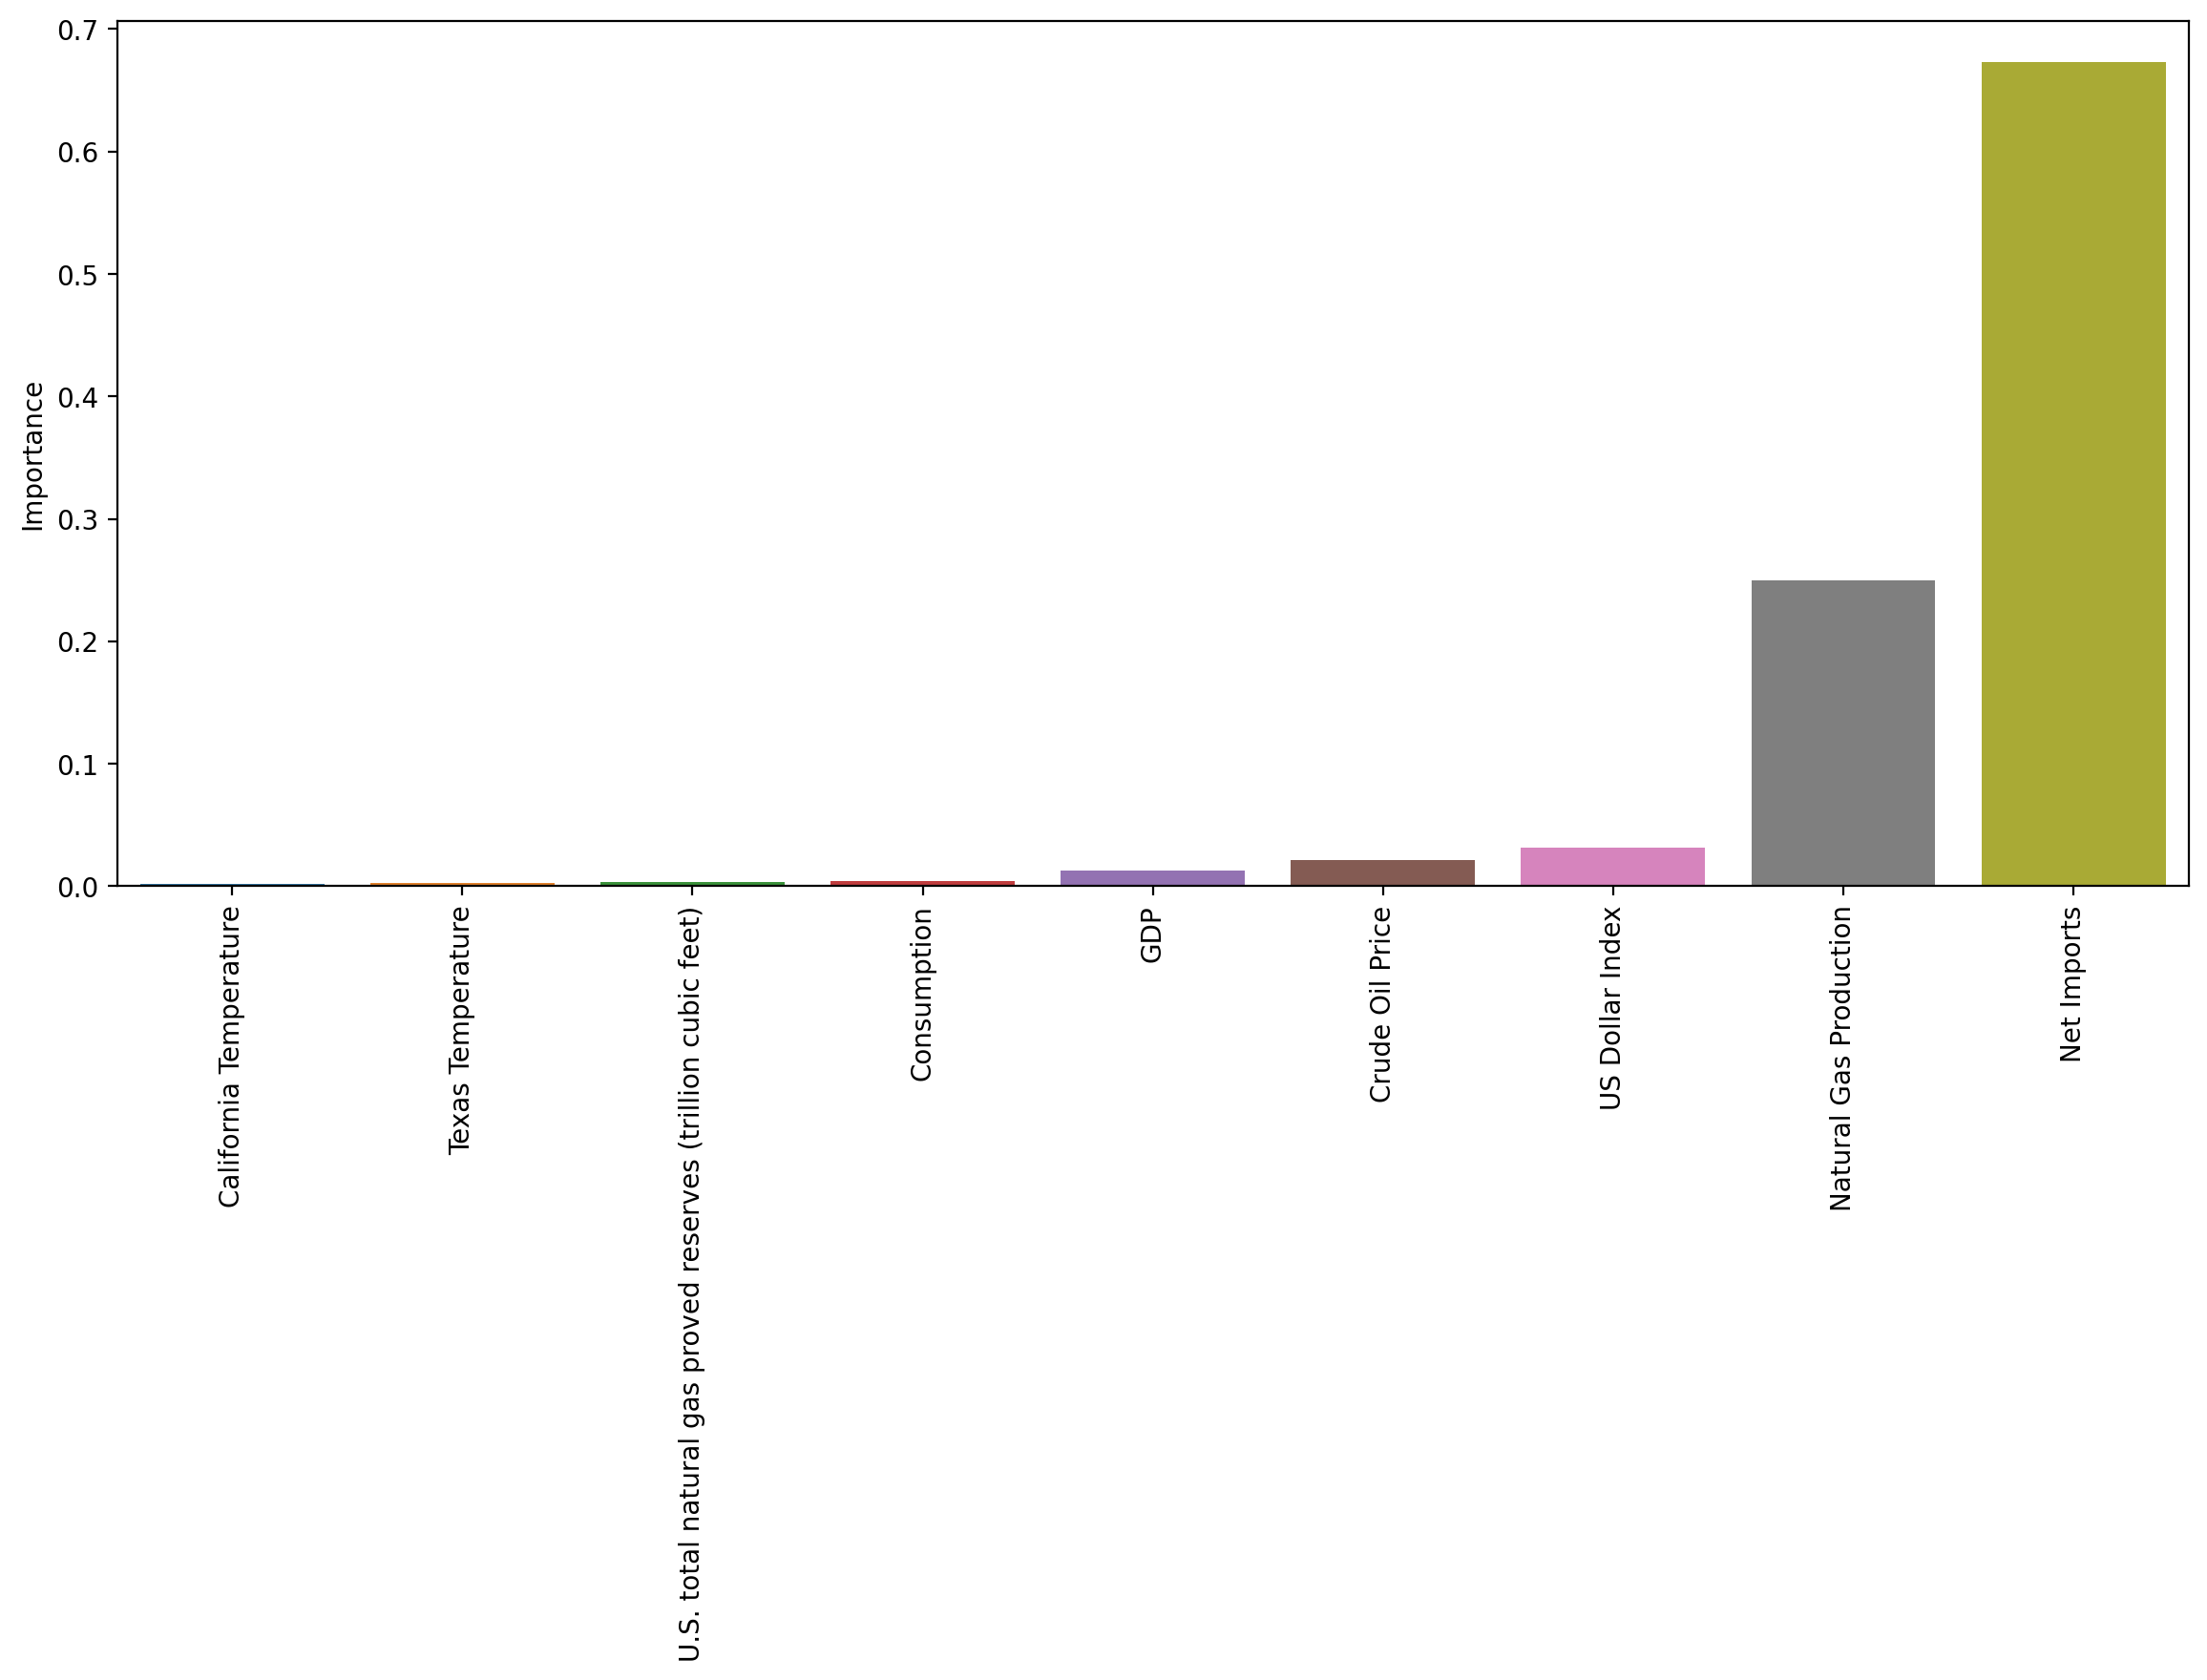

In [90]:
feat_import = XGBoost_model_CV.best_estimator_.feature_importances_
imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])
imp_feats = imp_feats.sort_values("Importance",ascending=False)
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);

## Semi-inference: For feature selection, as the the above bar plot and the 'feature_importances_' method call suggests, we can go for:

1. Net Imports of the Natural Gas
2. Natural Gas Production
3. US Dollar Index
4. Crude Oil Prices
5. USA's GDP
6. Natural Gas Consumption
7. Texas Temperatures
8. California Temperatures

### in this respective order. The way they quantitatively affect the target label is given below:

In [91]:
data = [['Net Imports','Positive (+)'],
        ['Natural Gas Production','Negative (-)'],
        ['US Dollar Index','Negative (-)'],
        ['Crude Oil Prices','Positive (+)'],
        ["USA's GDP",'Positive (+)'],
        ['Natural Gas Consumption','Negative (-)'],
        ['Texas Temperatures','Positive (+)'],
        ['California Temperatures','Negative (-)']]
dataa = pd.DataFrame(data, columns=['Features','Effect on Target'])
dataa

,Features,Effect on Target
0,Net Imports,Positive (+)
1,Natural Gas Production,Negative (-)
2,US Dollar Index,Negative (-)
3,Crude Oil Prices,Positive (+)
4,USA's GDP,Positive (+)
5,Natural Gas Consumption,Negative (-)
6,Texas Temperatures,Positive (+)
7,California Temperatures,Negative (-)


### Explaination:
#### Positive  --> With an increase in feature's value, the target value will also increase.
#### Negative --> With an increase in feature's value, the target value will decrease.